### Title: 
# Random Forest

### Description:
Random forests is a supervised learning algorithm. It can be used both for classification and regression. It is also the most flexible and easy to use algorithm. A forest is comprised of trees. It is said that the more trees it has, the more robust a forest is. Random forests creates decision trees on randomly selected data samples, gets prediction from each tree and selects the best solution by means of voting. It also provides a pretty good indicator of the feature importance.

In this notebook, we will perform the Randon Forest algorithm from the scikit-learn package, plot the confussion matrix and the ROC-AUC curve

### Authors:
#### Hugo Cesar Octavio del Sueldo
#### Jose Lopez Galdon

### Date:
04/12/2020

### Version:
1.0

***

### Libraries

In [1]:
    # Numpy & Pandas to work with the DF
import numpy as np
import pandas as pd

    # Seaborn / matplotlib for graphs
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

    # Import Sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import itertools

    # Visualize DF
from IPython.display import display, HTML

    #Import pickle
import pickle

### Functions

In [2]:
'''
This function prints and plots the confusion matrix:

cm = confussion_matrix using the prediction values
classes = name of the labels
cmap & tittle color map and tittle of the plot
'''
def plot_confusion_matrix(model_predictions, model_name,normalize = False): 
    cm = confusion_matrix(y_val, model_predictions, labels = [0, 1])
    classes=['Fully Pay', 'Non-payment']
    cmap = plt.cm.Reds
    title = f'{model_name} Confusion Matrix'
    fontsize = 12
    fontsize_lab = 15
    fontsize_tit = 20
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals = 3)
        
        # Plot params
    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title, fontsize = fontsize_tit)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 0, fontsize = fontsize)
    plt.yticks(tick_marks, classes, fontsize = fontsize)
    
        # Itercool params
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment = 'center',
                 color = 'white' if cm[i, j] > thresh else 'black')
    plt.tight_layout()
    plt.ylabel('True label', fontsize = fontsize_lab)
    plt.xlabel('Predicted label', fontsize = fontsize_lab)

### Load data

In [3]:
    # To automate the work as much as possible, we will parameterize the codes, so in this case, we will create an objetct with
    # the path root
name = 'X_train'

X_train = pd.read_csv(f'../data/03_processed/{name}.csv',  # Path root: here we include an f-string with the variable name
                   low_memory = False)                     # To avoid warnings we use set low_memory = False

name = 'Y_train'

y_train = pd.read_csv(f'../data/03_processed/{name}.csv',  # Path root: here we include an f-string with the variable name
                   low_memory = False)                     # To avoid warnings we use set low_memory = False

name = 'X_val'

X_val = pd.read_csv(f'../data/03_processed/{name}.csv',    # Path root: here we include an f-string with the variable name
                   low_memory = False)                     # To avoid warnings we use set low_memory = False

name = 'Y_val'

y_val = pd.read_csv(f'../data/03_processed/{name}.csv',    # Path root: here we include an f-string with the variable name
                   low_memory = False)                     # To avoid warnings we use set low_memory = False

In [4]:
    # Transform to 1d array
y_train = np.ravel(y_train)

### Random Forest Prediction

In [5]:
%%time
    # Train
rfreg = RandomForestClassifier(n_estimators = 1000, random_state = 1322, n_jobs = -1)
rfreg.fit(X_train, y_train)

    # Predict with the test and calculate tha accuracy
y_pred = rfreg.predict(X_val)

print('Accuracy of Random Forest classifier on test set: {:.5f}'.format(rfreg.score(X_val, y_val)))

Accuracy of Random Forest classifier on test set: 0.76464
CPU times: user 29min 34s, sys: 32.4 s, total: 30min 6s
Wall time: 8min 18s


### Importance columns

In [6]:
importance = pd.DataFrame(rfreg.feature_importances_, 
                          X_val.columns, 
                          columns = ['Importance']).sort_values(by = ['Importance'], 
                                                                ascending = False)
display(HTML(importance.to_html()))

,Importance
int_rate,5.221715e-02
dti,4.595935e-02
avg_cur_bal,4.081376e-02
bc_open_to_buy,3.898797e-02
mo_sin_old_rev_tl_op,3.853521e-02
revol_bal,3.720397e-02
bc_util,3.708976e-02
revol_util,3.695620e-02
annual_inc,3.659129e-02
mo_sin_old_il_acct,3.658278e-02


Some of the most important variables are `int_rate`, `annual_inc` or `funded_amnt` this makes sense with our first hypothesis. On the other hand, the `addr_state` is not important.

### Confussion Matrix

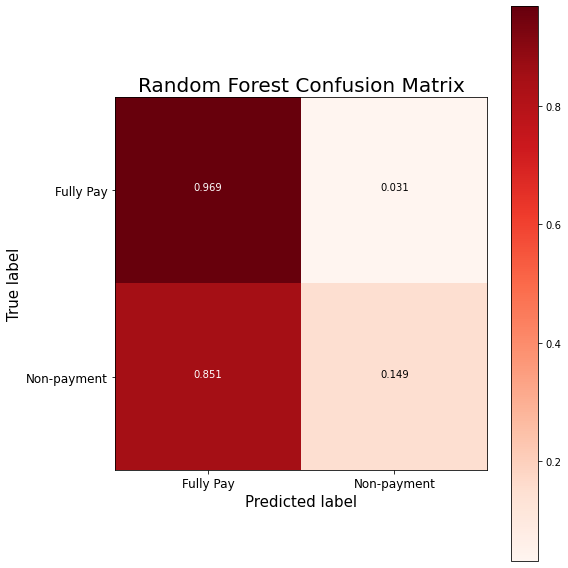

In [7]:
    # Set the size
plt.figure(figsize = (8, 8))

    # Use the function defined above
plot_confusion_matrix(y_pred, 'Random Forest', normalize = True)
plt.show()

Here we can see that our random forest model is quite good predicting Fully Pay members, because we have more than a 98.7% of *True Positives*, but is the worst predicting Non-payment clients, this is due from the total customers that non-pay we are predicting well only 15%.

### Classsification Report

In [8]:
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.97      0.86     47845
           1       0.62      0.15      0.24     15908

    accuracy                           0.76     63753
   macro avg       0.70      0.56      0.55     63753
weighted avg       0.74      0.76      0.71     63753



We can see at the `classification_report` that our model predict very well Fully Pay customers, because we have a high precision (remember *Precision = TP/(TP + FP)*) and therefore our recall (*Recall = TP/(TP+FN)*) is almost 100% this makes that the f1-score (*F1 Score = 2(Recall · Precision) / (Recall + Precision)*) is 89%.

On the other hand, as we said above the Random Forest model is very poor predicting Non-payment clientes. The main issue is that the recall is very low, that means we can not detect all the Non-payment, in other words, we have a bigger amount of False Positives.

### ROC Curve

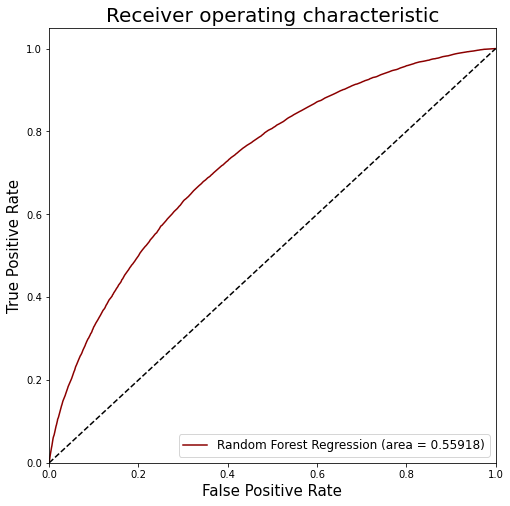

In [9]:
    # Create the roc score
rf_roc_auc = roc_auc_score(y_val, rfreg.predict(X_val))

    # Create the curve
fpr, tpr, thresholds = roc_curve(y_val, rfreg.predict_proba(X_val)[:,1])

    # Set the figure size
plt.figure(figsize = (8, 8))

    # Params for the plot
plt.plot(fpr, tpr, '#8B0000', label = 'Random Forest Regression (area = %0.5f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1],'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

    # Labels params
fontsize = 12
fontsize_lab = 15
fontsize_tit = 20

    # Labels, title and legend modifications
plt.xlabel('False Positive Rate', fontsize = fontsize_lab)
plt.ylabel('True Positive Rate', fontsize = fontsize_lab)
plt.title('Receiver operating characteristic', fontsize = fontsize_tit)
plt.legend(loc="lower right", fontsize = fontsize)

    # Save the figure for the final reprt
plt.savefig('RF_ROC')

    # Show the plot
plt.show()

AUC - ROC curve is a performance measurement for classification problem at various thresholds settings. ROC is a probability curve and AUC represents degree or measure of separability. It tells how much model is capable of distinguishing between classes. Higher the AUC, better the model is at predicting 0s as 0s and 1s as 1s.

In this case we have an AUC = 0.5695 this is not very high.

In [10]:
    #save the model to disk
model = rfreg
filename = "random_forest.sav"
pickle.dump(model, open(filename, 'wb'))